['tank_liquidlevel', 'flowlevel', 'bottle_liquidlevel', 'motor_status']
######### NORMAL DATASET ###########
normal    1137
Name: class, dtype: int64
######### ATTACK DATASET ###########
False data injection    36
Name: class, dtype: int64
Data tampering    227
Name: class, dtype: int64
DoS    88
Name: class, dtype: int64
Scaling    434
Name: class, dtype: int64
######### TEST DATASET #############
normal                  1920
Scaling                  434
Data tampering           227
DoS                       88
False data injection      36
Name: class, dtype: int64
[['Data tampering' '81']
 ['DoS' '37']
 ['False data injection' '409']
 ['Scaling' '986']
 ['normal' '1192']]
[4 2 4 ... 3 3 3]

Prediction accuracy for the test dataset
47.21%

Confusion Matrix
[[ 52   0  18 105  52]
 [  0  37   0  51   0]
 [  0   0  17   0  19]
 [ 26   0  50 204 154]
 [  3   0 324 626 967]]


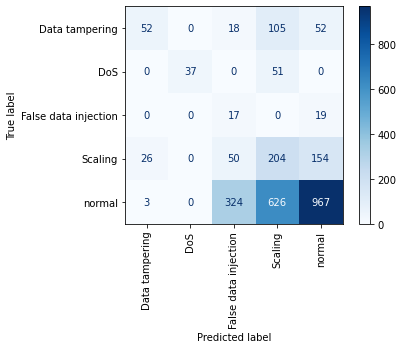

In [6]:
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

X1 = pd.read_csv("C:/Users/sebaa/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/data.csv")
X2 = pd.read_csv("C:/Users/sebaa/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/FDI.csv")
X3 = pd.read_csv("C:/Users/sebaa/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/DataTampering.csv")
X4 = pd.read_csv("C:/Users/sebaa/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/DoS.csv")
X5 = pd.read_csv("C:/Users/sebaa/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/Scaling.csv")

test = pd.read_csv("C:/Users/sebaa/OneDrive/Studies/Thesis_RISE_2021/Thesis_ML_impl/labelled1.csv")

features = X1.columns.tolist()
features.remove('timestamp'), features.remove('class')
print(features)

# Distribution of normal and anomaly traffic in train data
print('######### NORMAL DATASET ###########')
print(X1['class'].value_counts())
print('######### ATTACK DATASET ###########')
print(X2['class'].value_counts())
print(X3['class'].value_counts())
print(X4['class'].value_counts())
print(X5['class'].value_counts())
print('######### TEST DATASET #############')
print(test['class'].value_counts())

train_x1 = X1[features]; train_x2 = X2[features]; train_x3 = X3[features]; train_x4 = X4[features]; train_x5 = X5[features]
train_y1 = X1['class'];train_y2 = X2['class']; train_y3 = X3['class'];train_y4 = X4['class']; train_y5 = X5['class']

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_y1 = LabelEncoder()
train_y1 = labelencoder_y1.fit_transform(train_y1)
labelencoder_y2 = LabelEncoder()
train_y2 = labelencoder_y2.fit_transform(train_y2)
labelencoder_y3 = LabelEncoder()
train_y3 = labelencoder_y3.fit_transform(train_y3)
labelencoder_y4 = LabelEncoder()
train_y4 = labelencoder_y4.fit_transform(train_y4)
labelencoder_y5 = LabelEncoder()
train_y5 = labelencoder_y5.fit_transform(train_y5)

test_x = test[features]
test_y = test['class']
labelencoder_y = LabelEncoder()
test_y = labelencoder_y.fit_transform(test_y)


from sklearn import metrics
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

clf1 = GaussianHMM(n_components=6, covariance_type='diag', n_iter=100).fit(train_x1, lengths=[47,45,43,48,54])
clf2 = GaussianHMM(n_components=6, covariance_type='diag', n_iter=100).fit(train_x2)
clf3 = GaussianHMM(n_components=6, covariance_type='diag', n_iter=100).fit(train_x3)
clf4 = GaussianHMM(n_components=6, covariance_type='diag', n_iter=100).fit(train_x4)
clf5 = GaussianHMM(n_components=6, covariance_type='diag', n_iter=100).fit(train_x5)

res = []
pred_test_hmm = []
for i in range(len(test_x)):
    a = clf1.score(test_x.iloc[[i]])
    b = clf2.score(test_x.iloc[[i]])
    c = clf3.score(test_x.iloc[[i]])
    d = clf4.score(test_x.iloc[[i]])
    e = clf5.score(test_x.iloc[[i]])
    out = {a:'a', b:'b', c:'c', d:'d', e:'e'}
    final_est = out.get(max(out))
    if(final_est == 'a'):
        res.append('normal')
        pred_test_hmm.append('normal')
    elif final_est == 'b':
        res.append('False data injection')
        pred_test_hmm.append('False data injection')
    elif final_est == 'c':
        res.append('Data tampering')
        pred_test_hmm.append('Data tampering')
    elif final_est == 'd':
        res.append('DoS')
        pred_test_hmm.append('DoS')
    elif final_est == 'e':
        res.append('Scaling')
        pred_test_hmm.append('Scaling')
            
(unique, counts) = np.unique(res, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

labelencoder_p = LabelEncoder()
pred_test_hmm = labelencoder_p.fit_transform(pred_test_hmm)

print(pred_test_hmm)
print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(test_y, pred_test_hmm)))

print('Confusion Matrix')
print(metrics.confusion_matrix(test_y, pred_test_hmm))
metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(test_y, pred_test_hmm), display_labels=
                               ['Data tampering','DoS', 'False data injection', 'Scaling', 'normal']).plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()

